In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.cluster import KMeans

from functions import display_scree_plot
from yellowbrick.features import PCA as PCAViz
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [4]:
dataset = pd.read_csv('./clean_dataset.csv', index_col=0)
dataset

,mean_command_price,mean_command_freight_value,articles_per_cart,order_per_client,prefered_payment,mean_review,cancel_ratio,payment_installments,recency,frequency,monetary
customer_unique_id,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,12.00,1.0,1.0,credit_card,5.0,0.0,8.0,161,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,8.29,1.0,1.0,credit_card,4.0,0.0,1.0,164,1,18.90
0000f46a3911fa3c0805444483337064,69.00,17.22,1.0,1.0,credit_card,3.0,0.0,8.0,586,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,25.99,17.63,1.0,1.0,credit_card,4.0,0.0,4.0,370,1,25.99
0004aac84e0df4da2b147fca70cf8255,180.00,16.89,1.0,1.0,credit_card,5.0,0.0,6.0,337,1,180.00
...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,497.42,2.0,1.0,credit_card,5.0,0.0,10.0,496,2,1570.00
fffea47cd6d3cc0a88bd621562a9d061,64.89,19.69,1.0,1.0,credit_card,4.0,0.0,1.0,311,1,64.89
ffff371b4d645b6ecea244b27531430a,89.90,22.56,1.0,1.0,credit_card,5.0,0.0,1.0,618,1,89.90


In [10]:
dataset.columns.drop(['monetary', 'recency', 'frequency'])

Index(['mean_command_price', 'mean_command_freight_value', 'articles_per_cart',
       'order_per_client', 'prefered_payment', 'mean_review', 'cancel_ratio',
       'payment_installments'],
      dtype='object')

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94720 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mean_command_price          94720 non-null  float64
 1   mean_command_freight_value  94720 non-null  float64
 2   articles_per_cart           94720 non-null  float64
 3   order_per_client            94720 non-null  float64
 4   prefered_payment            94720 non-null  object 
 5   mean_review                 94720 non-null  float64
 6   cancel_ratio                94720 non-null  float64
 7   payment_installments        94720 non-null  float64
 8   recency                     94720 non-null  int64  
 9   frequency                   94720 non-null  int64  
 10  monetary                    94720 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 8.7+ MB


In [7]:
def preprocess(dataset):
    """Add features engineering to the dataset"""
    categorical_features = dataset.select_dtypes(include=['category']).columns
    log_features = ['']
    dropped_features = pd.Index([])#'cancel_ratio', 'order_per_client'])
    categorical_transformer = 'drop' #OneHotEncoder(sparse=False, handle_unknown='ignore')
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    log_transformer = Pipeline(steps=[('log', FunctionTransformer(np.log)), ('numeric', numeric_transformer)])

    preprocessor = ColumnTransformer(
      transformers=[
          ('cat', categorical_transformer, categorical_features),
          ('log', log_transformer, log_features),
          ('drop', 'drop', dropped_features)
      ],
      remainder=numeric_transformer,
      n_jobs=-1
    )

    preprocessor.fit(dataset)
    #new_columns = preprocessor.named_transformers_['cat'].get_feature_names(categorical_features)
    #columns = pd.Index(new_columns).append(dataset.columns.drop(categorical_features))
    columns = dataset.columns.drop(categorical_features.append(dropped_features))
    return pd.DataFrame(preprocessor.transform(dataset), columns=columns)

In [12]:
X = preprocess(dataset)
X

,recency,frequency,monetary
0,-0.832621,-0.281113,-0.074735
1,-0.813067,-0.281113,-0.519880
2,1.937662,-0.281113,-0.318963
3,0.529706,-0.281113,-0.491446
4,0.314602,-0.281113,0.126181
...,...,...,...
96091,1.351014,0.891008,5.700508
96092,0.145126,-0.281113,-0.335445
96093,2.146249,-0.281113,-0.235148
96094,-0.780475,-0.281113,-0.134489


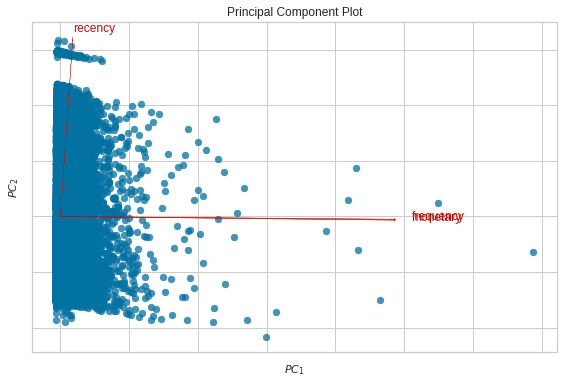

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [13]:
pca_visualizer = PCAViz(proj_features=True, scale=False)
pca_visualizer.fit_transform(X)
pca_visualizer.show()

In [6]:
pca_visualizer.pca_components_

array([[ 0.56889668,  0.61149428,  0.41896213,  0.03124664,  0.06728191,
         0.34842337],
       [-0.21455868,  0.09055118,  0.44590371,  0.09645187,  0.70558641,
        -0.48967315]])

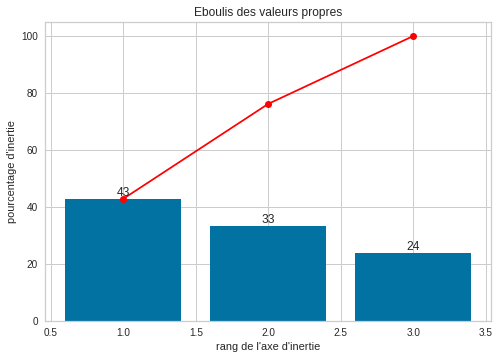

In [14]:
pca = PCA(n_components=len(X.columns))
pca.fit(X)
display_scree_plot(pca)

In [8]:
X_projected = pca.transform(X)
X_projected.shape

(94720, 6)

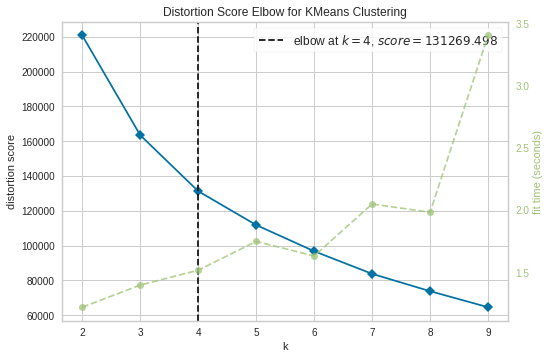

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(X)
visualizer.show()

In [16]:
visualizer.elbow_value_

4

In [17]:
model = KMeans(visualizer.elbow_value_, random_state=3)
model.fit(X)

KMeans(n_clusters=4, random_state=3)

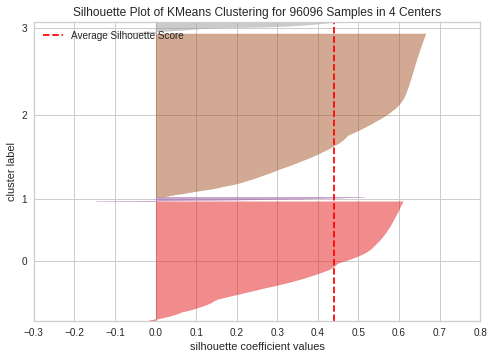

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 96096 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
silhouette_visualizer = SilhouetteVisualizer(model)
silhouette_visualizer.fit(X)
silhouette_visualizer.show()

In [15]:
len(silhouette_visualizer.silhouette_samples_)

94720

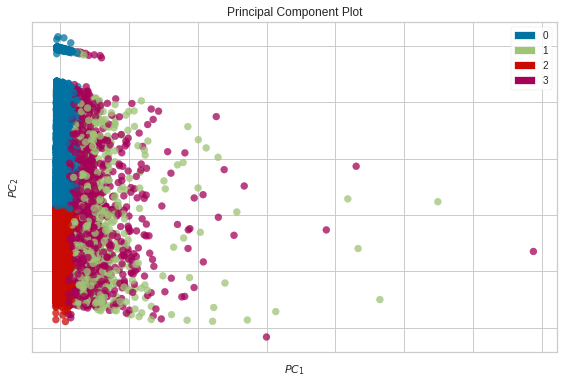

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [19]:
pca_visualizer = PCAViz(scale=False)
pca_visualizer.fit_transform(X,model.labels_)
pca_visualizer.show()

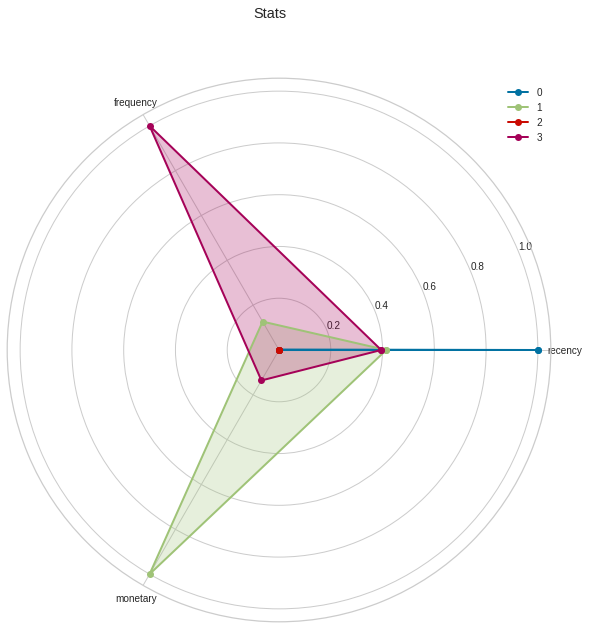

In [20]:
from sklearn.preprocessing import MinMaxScaler
centroids = model.cluster_centers_

scaler = MinMaxScaler()
labels = X.columns.values #np.array(["mean_command_price", "mean_command_freight_value", "articles_per_cart", "order_per_client", "cancel_ratio", "payment_installments"])
stats = scaler.fit_transform(centroids)

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
angles=np.concatenate((angles,[angles[0]]))
first_stats = np.array([stat[0] for stat in stats]).reshape(-1,1)
stats = np.append(stats, first_stats, axis=1)

fig=plt.figure(figsize=(10,10))
for i in range(0, len(stats)):
    stat = stats[i]
    ax = plt.subplot(polar=True)
    ax.plot(angles, stat, 'o-', linewidth=2)
    ax.fill(angles, stat, alpha=0.25)
plt.thetagrids(angles[0:-1] * 180/np.pi, labels)
fig.suptitle("Stats")
plt.legend(range(0, len(centroids)))
plt.show()

À première vue, nous pouvons découper les clients en 5 groupes :
1. Les clients "habitués" effectuant beaucoup de petites commandes peu coûteuses (en jaune)
2. Les clients "mécontants" effectuant peu de commande d'un prix modéré mais à fort risque d'annulation (en vert)
3. Les clients "à crédit" effectuant peu de commande d'un prix moyen mais payant à crédit (en rouge)
4. Les clients "dépensier" effectuant peu de commande mais contenant beaucoup d'article pour un prix conséquent (en bleu)

In [77]:
dataset['label'] = model.labels_
dataset['label'].value_counts()

/home/jbrichardet/.local/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


0    59296
1    24788
3     7427
2     2878
Name: label, dtype: int64

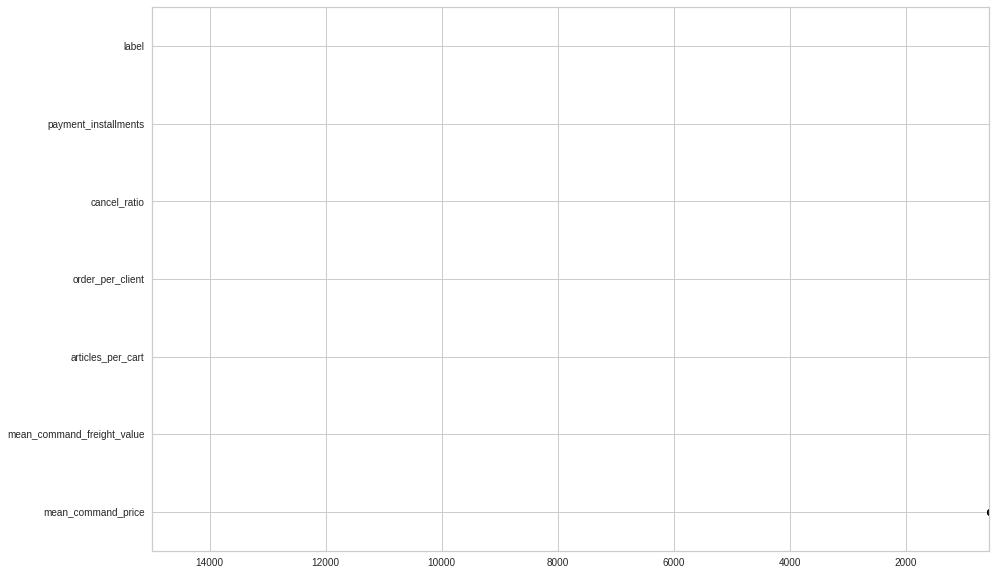

In [94]:
ax = dataset[dataset['label'] == 0].boxplot(vert=False, figsize=(15,10))
ax.set_xlim(15000)
plt.show()

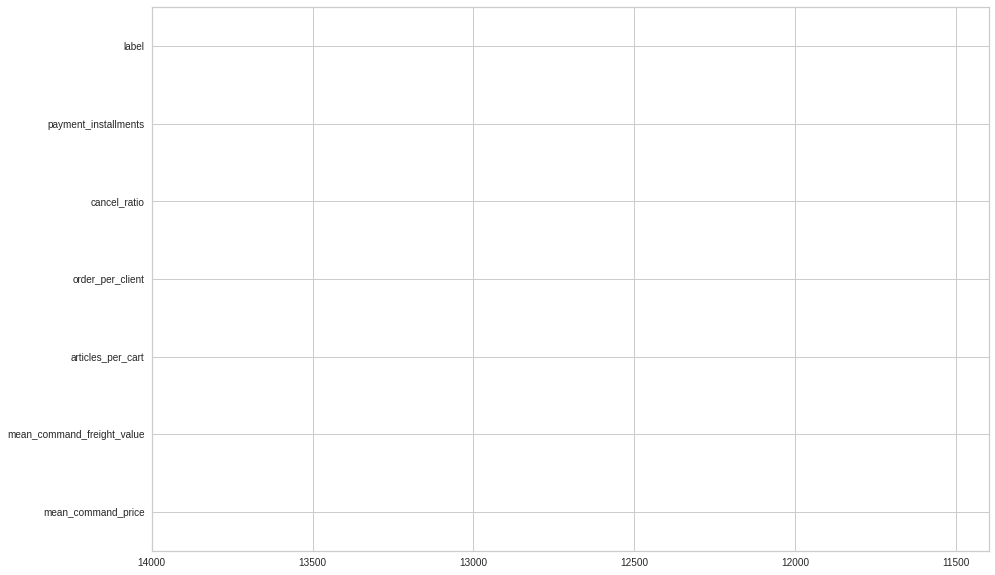

In [95]:
ax = dataset[dataset['label'] == 1].boxplot(vert=False, figsize=(15,10))
plt.show()

<AxesSubplot:>

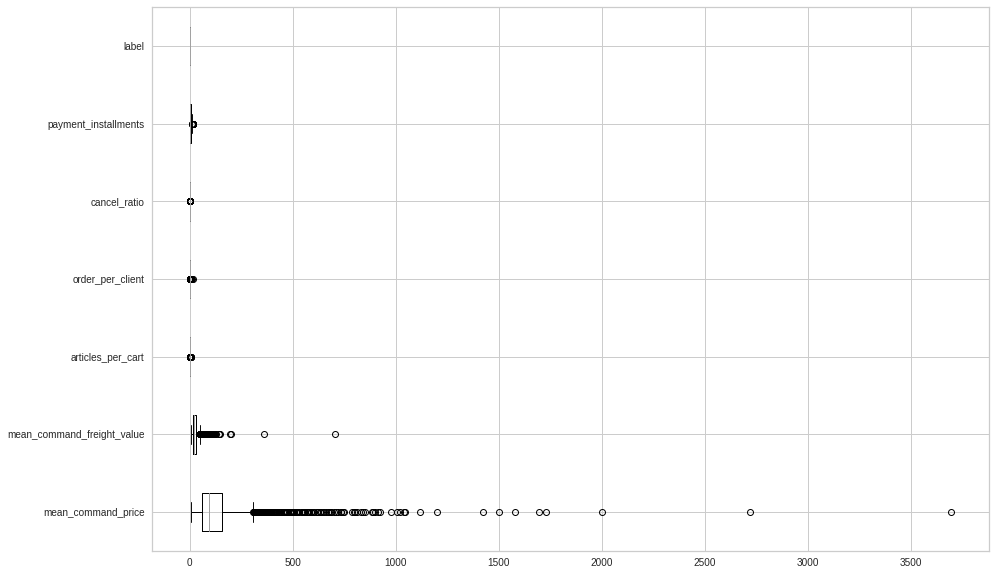

In [92]:
dataset[dataset['label'] == 2].boxplot(vert=False, figsize=(15,10))

<AxesSubplot:>

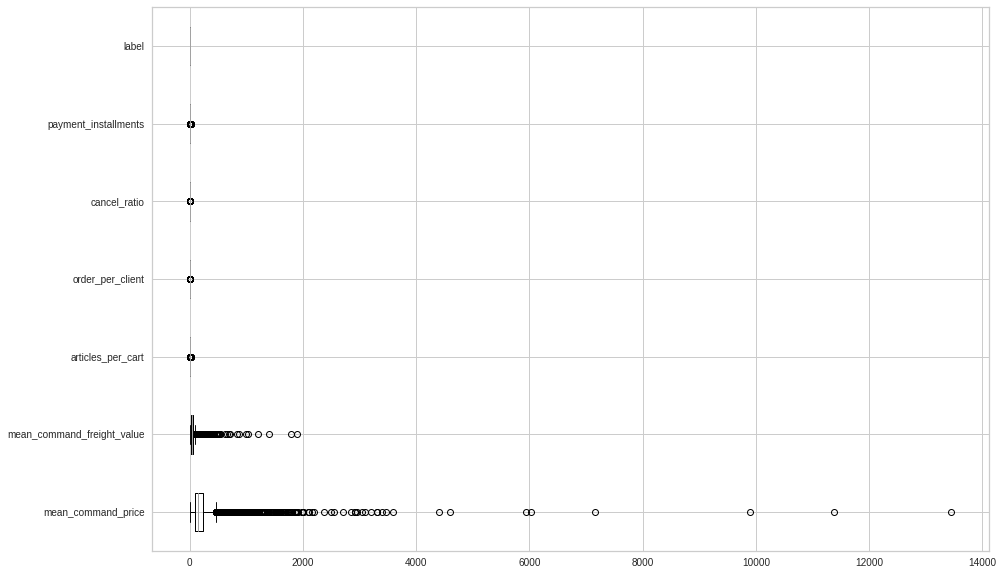

In [93]:
dataset[dataset['label'] == 3].boxplot(vert=False, figsize=(15,10))

# TODO
* Faire un boxplot pour chaque variable de chaque cluster
* Qualifier chaque cluster pour le marketing
* Regarder le score [ARI (Adjusted Rand Index)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html). Sectionner le df en période et comparer le score avec le model "complet" et les models avec X périodes. Ou comparer les périodes 2 à 2 (1 vs 1+2, etc)